In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import lightgbm as lgb
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

# 1.Data Processing and Analysis

In [89]:
data = pd.read_csv("/Users/nataliechang/Desktop/Eluvio_DS_Challenge.csv")

In [90]:
data = data.drop(columns=['down_votes','category'])
data.head()

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [91]:
data['date_created'] = data['date_created'].map(lambda x: x.replace('-',''))

In [92]:
set(data['over_18'])

{False, True}

In [93]:
data['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

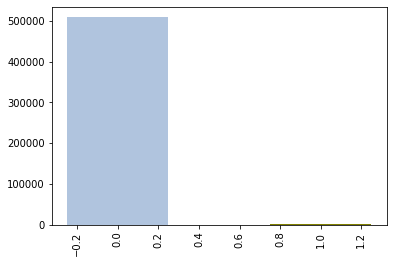

In [94]:
plt.bar(data['over_18'].unique(),
        data['over_18'].value_counts(), 
        width=0.5, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue',  
               'olive'])
plt.xticks(rotation='vertical')
plt.show()

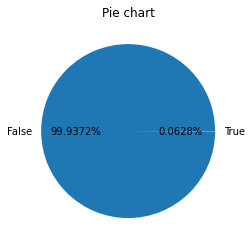

In [95]:
count_Class=pd.value_counts(data['over_18'], sort= True)
count_Class.plot(kind = 'pie',autopct='%1.4f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [96]:
from collections import Counter
word_counts = Counter(list(data['author']))

top_three = word_counts.most_common(50)
print(top_three)

[('davidreiss666', 8897), ('anutensil', 5730), ('DoremusJessup', 5037), ('maxwellhill', 4023), ('igeldard', 4013), ('readerseven', 3170), ('twolf1', 2923), ('madam1', 2658), ('nimobo', 2564), ('madazzahatter', 2503), ('ionised', 2493), ('NinjaDiscoJesus', 2448), ('bridgesfreezefirst', 2405), ('SolInvictus', 2181), ('Libertatea', 2108), ('vigorous', 2077), ('galt1776', 1897), ('DougBolivar', 1770), ('bob21doh', 1698), ('trot-trot', 1649), ('DrRichardCranium', 1616), ('pnewell', 1562), ('XKryptonite', 1516), ('Wagamaga', 1490), ('scienceben', 1399), ('pool92', 1397), ('EightRoundsRapid', 1223), ('kulkke', 1199), ('PanAfrica', 1183), ('mortalaa', 1180), ('LuckyBdx4', 1170), ('emr1028', 1094), ('alllie', 1092), ('misterAction', 1016), ('redhatGizmo', 1012), ('silence_hr', 1000), ('commonsenseIR', 994), ('Ze_Carioca', 979), ('BlankVerse', 970), ('oshunsmall', 962), ('i_love_fsa', 952), ('User_Name13', 938), ('Another-Chance', 936), ('MrTulip', 915), ('Kaffir', 903), ('conuly', 892), ('elusi

Label encoding - author

In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data['author'] = labelencoder.fit_transform(data['author'])
data['over_18'] = labelencoder.fit_transform(data['over_18'])
data

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,20080125,3,Scores killed in Pakistan clashes,0,69315
1,1201232075,20080125,2,Japan resumes refuelling mission,0,69315
2,1201232523,20080125,3,US presses Egypt on Gaza border,0,69315
3,1201233290,20080125,1,Jump-start economy: Give health care to all,0,47884
4,1201274720,20080125,4,Council of Europe bashes EU&UN terror blacklist,0,62766
...,...,...,...,...,...,...
509231,1479816764,20161122,5,Heil Trump : Donald Trump s alt-right white...,0,66229
509232,1479816772,20161122,1,There are people speculating that this could b...,0,28544
509233,1479817056,20161122,1,Professor receives Arab Researchers Award,0,1240
509234,1479817157,20161122,1,Nigel Farage attacks response to Trump ambassa...,0,75836


In [98]:
from collections import Counter
word_counts = Counter(list(data['author']))

top_three = word_counts.most_common(50)
print(top_three)

[(44158, 8897), (36192, 5730), (8612, 5037), (62103, 4023), (53662, 4013), (71090, 3170), (81403, 2923), (61021, 2658), (65916, 2564), (61028, 2503), (54431, 2493), (21504, 2448), (39863, 2405), (27666, 2181), (17720, 2108), (82488, 2077), (49717, 1897), (8653, 1770), (39247, 1698), (81054, 1649), (8753, 1616), (69234, 1562), (32872, 1516), (32118, 1490), (73894, 1399), (69421, 1397), (9342, 1223), (58836, 1199), (22798, 1183), (63917, 1180), (18257, 1170), (47140, 1094), (35245, 1092), (63277, 1016), (71409, 1012), (75117, 1000), (42527, 994), (33368, 979), (4260, 970), (67586, 962), (53305, 952), (31546, 938), (2450, 936), (20511, 915), (16186, 903), (42652, 892), (47010, 886), (81891, 883), (46265, 863), (38860, 851)]


In [99]:
data[data['author']==44158]

,time_created,date_created,up_votes,title,over_18,author
8376,1212650915,20080605,0,Algerian Christian converts found guilty of wo...,0,44158
10020,1214300009,20080624,3,Update on the people of the Former Soviet Unio...,0,44158
10218,1214479193,20080626,6,From Canada: Court ruling said that four Canad...,0,44158
10977,1215359509,20080706,0,A report commissioned by the Church of England...,0,44158
11112,1215503419,20080708,4,G8 heads urge African leaders to oust Mugabe,0,44158
...,...,...,...,...,...,...
486420,1471888630,20160822,3,France s Sarkozy to run for 2017 presidential ...,0,44158
486441,1471893810,20160822,8,Iran’s defense minister criticized Russia for ...,0,44158
490008,1473135541,20160906,1,Russia and Saudi Arabia pledge to curb excess...,0,44158
490131,1473171213,20160906,7,Swedish Nobel judges fired in Karolinska medic...,0,44158


In [100]:
data[data['over_18']==1]

,time_created,date_created,up_votes,title,over_18,author
1885,1206381438,20080324,189,Pics from the Tibetan protests - more graphic ...,1,69702
6721,1211138718,20080518,5,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",1,35245
8414,1212694925,20080605,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,1,77160
12163,1216672016,20080721,0,Love Parade Dortmund: Techno Festival Breaks R...,1,77160
12699,1217381380,20080730,5,IDF kills young Palestinian boy. Potentially N...,1,43329
...,...,...,...,...,...,...
503776,1477889966,20161031,4,Latest Italian Earthquake Devastates Medieval ...,1,69038
508067,1479400229,20161117,12,ISIS Release Video Showing Melbourne As A Poss...,1,51549
508176,1479434681,20161118,0,Animal welfare activists have released footage...,1,21504
508376,1479492875,20161118,6,Jungle Justice : Public lynching of a street ...,1,37160


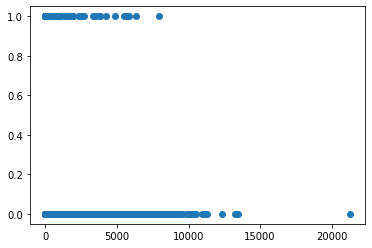

In [101]:
plt.scatter(data['up_votes'],data['over_18'])

In [102]:
data_upvote = data.groupby(['up_votes'],as_index=False)['up_votes'].agg({'cnt':'count'})

(array([2.120e+03, 1.898e+03, 1.311e+03, 4.090e+02, 3.700e+01, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2125.3,  4250.6,  6375.9,  8501.2, 10626.5, 12751.8,
        14877.1, 17002.4, 19127.7, 21253. ]),
 <BarContainer object of 10 artists>)

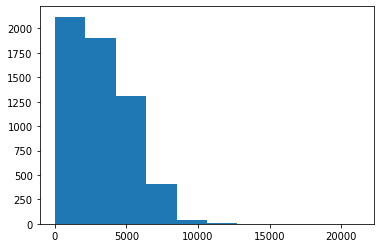

In [103]:
plt.hist(data_upvote['up_votes'],bins=10)

In [85]:
def binned(data,col,n):
    data[col] = pd.qcut(data[col], n, labels=[0,1,2,3,4], duplicates='drop')
    return data

In [86]:
binned(data,'up_votes',5)

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,20080125,1,Scores killed in Pakistan clashes,0,69315
1,1201232075,20080125,1,Japan resumes refuelling mission,0,69315
2,1201232523,20080125,1,US presses Egypt on Gaza border,0,69315
3,1201233290,20080125,0,Jump-start economy: Give health care to all,0,47884
4,1201274720,20080125,2,Council of Europe bashes EU&UN terror blacklist,0,62766
...,...,...,...,...,...,...
509231,1479816764,20161122,2,Heil Trump : Donald Trump s alt-right white...,0,66229
509232,1479816772,20161122,0,There are people speculating that this could b...,0,28544
509233,1479817056,20161122,0,Professor receives Arab Researchers Award,0,1240
509234,1479817157,20161122,0,Nigel Farage attacks response to Trump ambassa...,0,75836


In [87]:
data[data['up_votes']==3]

,time_created,date_created,up_votes,title,over_18,author
5,1201287889,20080125,3,Hay presto! Farmer unveils the illegal mock-...,0,2750
11,1201719875,20080130,3,Top US Envoy: Violence In Kenya Is Ethnic Cle...,0,75754
51,1202312893,20080206,3,Russia is steadily unravelling the historic ...,0,75117
53,1202331412,20080206,3,Multiple Impeachment Resolutions pass in Minne...,0,19722
71,1202405897,20080207,3,Modern Slavery: A world map,0,45199
...,...,...,...,...,...,...
509188,1479810217,20161122,3,World s First Head Transplant Will Use Virtual...,0,27002
509190,1479810594,20161122,3,US leaving TPP: A great news day for China,0,72843
509191,1479810775,20161122,3,56-car pileup in China leaves 17 dead,0,17603
509200,1479812515,20161122,3,Extraordinarily hot Arctic temperatures alar...,0,70975


# 2.Text processing - Word2Vec

In [104]:
from gensim.models import Word2Vec
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [105]:
def cleanText(data):
    stemmer = SnowballStemmer("english")
    text = data['title']
    text2 = []
    for i in range(len(data)):
        tokens = word_tokenize(text[i])
        # stemming of words
        porter = PorterStemmer()
        stemmed = [porter.stem(word) for word in tokens]
        text2.append(stemmed)
    return text2

In [106]:
def build_sentence_vector(sentence,size,w2v_model):
    sen_vec = np.random.uniform(0,1/size,size).reshape((1,size))
    count = 0
    for word in sentence:
        try:
            sen_vec += w2v_model[word].reshape((1,size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        sen_vec /= count
    return sen_vec

In [107]:
def new_dataset(data):
    dataset = cleanText(data)
    n_dim = 50
    w2v_model = Word2Vec(dataset, sg=1, size=n_dim, min_count=10, hs=0)
    w2v_model.save('w2v_model')

    data_list = []
    for i in range(len(data)):
        data_list.append(str(dataset[i]))
    docvec_list = np.concatenate([build_sentence_vector(sen,50,w2v_model) for sen in data_list])
    
    #class_mapping = {label: idx for idx, label in enumerate(np.unique(data['issue']))}
    #data['issue'] = data['issue'].map(class_mapping)
    #class_mapping2 = {label: idx for idx, label in enumerate(np.unique(train_data['author']))}
    #data['author'] = data['author'].map(class_mapping2)
    
    docvec_list = pd.DataFrame(docvec_list)
    #train_docvec_list
    new_data = data.iloc[:,[0,1,2,4,5]]
    #new_train_data
    new_data2 = pd.concat([new_data,docvec_list], axis=1)
    return new_data2

In [108]:
data2 = new_dataset(data)

<ipython-input-106-b57e5f515189>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sen_vec += w2v_model[word].reshape((1,size))


In [109]:
data2

,time_created,date_created,up_votes,over_18,author,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,49
0,1201232046,20080125,3,0,69315,0.396418,0.416111,-0.140830,-0.122906,-0.007171,...,0.012897,-0.313888,-0.247424,0.105077,-0.253698,-0.160271,-0.398116,-0.272533,0.171203,0.016264
1,1201232075,20080125,2,0,69315,0.318112,0.461024,-0.187150,-0.129784,-0.000121,...,0.003743,-0.366208,-0.204770,0.137073,-0.259112,-0.059609,-0.412946,-0.240527,0.219804,0.020897
2,1201232523,20080125,3,0,69315,0.228602,0.390319,-0.212624,-0.073184,-0.002449,...,0.052645,-0.273850,-0.184386,0.069483,-0.333189,-0.023667,-0.468573,-0.200350,0.221507,-0.048861
3,1201233290,20080125,1,0,47884,0.300114,0.409854,-0.185108,-0.155581,-0.018449,...,0.064598,-0.315295,-0.220278,0.134799,-0.236647,-0.073387,-0.425813,-0.278986,0.192582,-0.036733
4,1201274720,20080125,4,0,62766,0.322582,0.370314,-0.171564,-0.125510,-0.060154,...,0.030546,-0.290598,-0.264130,0.093206,-0.259618,-0.102852,-0.462805,-0.268697,0.210919,-0.073568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509231,1479816764,20161122,5,0,66229,0.346387,0.464090,-0.143212,-0.202008,0.018048,...,0.044749,-0.392585,-0.132922,0.101454,-0.232888,-0.092470,-0.394172,-0.329388,0.210114,0.008675
509232,1479816772,20161122,1,0,28544,0.320603,0.416270,-0.205606,-0.165344,-0.027843,...,0.062249,-0.308665,-0.205427,0.123271,-0.300495,-0.068409,-0.409076,-0.281762,0.210358,-0.045188
509233,1479817056,20161122,1,0,1240,0.247716,0.351796,-0.229999,-0.124978,-0.003338,...,0.070697,-0.278487,-0.193082,0.107995,-0.333157,-0.053847,-0.389200,-0.190397,0.207689,0.031239
509234,1479817157,20161122,1,0,75836,0.257921,0.400686,-0.190681,-0.220274,0.020952,...,0.074035,-0.367920,-0.081418,0.127968,-0.304147,-0.045511,-0.418778,-0.311586,0.232118,-0.012954


In [26]:
data2.to_csv("word2vec_data.csv",index=False)

# Model1 - predict up_vote 5 classes

In [27]:
import torch.nn as nn
import torch

In [28]:
X_train = np.array(data2.drop(columns=['up_votes']))
y = np.array(data2['up_votes'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, X_train.shape[1]).astype('float32')
X_val = X_val.reshape(-1, X_val.shape[1]).astype('float32')

X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)

In [29]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(X_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [30]:
data_set = Data()
trainloader = DataLoader(dataset=data_set,batch_size=64)
data_set.x[1:2]

tensor([[ 1.4737e+09,  2.0161e+07,  0.0000e+00,  5.0880e+03,  2.1811e-01,
          4.8152e-01, -1.2096e-01, -2.1288e-01, -7.4610e-02,  1.0587e-01,
          1.9367e-01, -8.8264e-02,  4.2074e-01,  4.7643e-02,  3.9313e-02,
         -2.0039e-01, -8.0570e-03, -9.8277e-03, -1.3215e-01, -1.1523e-02,
          5.6610e-03,  2.8591e-01, -4.1673e-01, -1.8125e-01,  1.8185e-01,
          2.2325e-02,  1.9595e-01,  1.8917e-01,  2.6449e-01,  2.8414e-02,
          9.8005e-02,  1.3620e-01,  1.3662e-02,  3.4738e-01, -1.7951e-02,
         -1.8148e-01, -6.7704e-02,  1.8513e-01,  5.6103e-03,  3.2204e-01,
          8.7845e-02,  4.8390e-02,  3.5038e-01,  1.8140e-01, -2.0764e-02,
         -3.0084e-01, -1.6609e-01,  4.4040e-02, -1.3707e-01, -1.2935e-01,
         -4.5066e-01, -2.6423e-01,  1.3269e-01, -5.3523e-02]])

In [31]:
data_set.y[1:10]

tensor([3, 3, 4, 4, 3, 1, 4, 1, 0])

In [32]:
data_set.x.shape, data_set.y.shape

(torch.Size([407388, 54]), torch.Size([407388]))

In [33]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

In [34]:
input_dim = 54     # number of Variables
hidden_dim = 25    # hidden layers
output_dim = 5     # number of classes
input_dim

54

In [35]:
model = Net(input_dim,hidden_dim,output_dim)

In [36]:
print('W:',list(model.parameters())[0].size())
print('b',list(model.parameters())[1].size())

W: torch.Size([25, 54])
b torch.Size([25])


In [37]:
criterion = nn.CrossEntropyLoss()

In [38]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [39]:
n_epochs = 1000
loss_list = []

for epoch in range(n_epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z,y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data) 
        #print('epoch {}, loss {}'.format(epoch, loss.item()))

In [41]:
z = model(X_val)

In [42]:
yhat = torch.argmax(z.data,1)
yhat.tolist()
y_val.tolist()

[3,
 0,
 4,
 4,
 3,
 4,
 3,
 2,
 3,
 1,
 2,
 0,
 2,
 4,
 0,
 1,
 0,
 0,
 2,
 4,
 3,
 0,
 2,
 0,
 2,
 2,
 4,
 1,
 3,
 0,
 0,
 4,
 0,
 0,
 3,
 1,
 4,
 0,
 4,
 1,
 4,
 1,
 0,
 1,
 0,
 3,
 3,
 3,
 4,
 0,
 4,
 2,
 1,
 1,
 2,
 0,
 2,
 3,
 2,
 0,
 4,
 0,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 0,
 2,
 0,
 4,
 1,
 4,
 0,
 0,
 3,
 4,
 0,
 2,
 0,
 4,
 0,
 0,
 2,
 4,
 3,
 0,
 3,
 1,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 0,
 4,
 0,
 0,
 3,
 4,
 2,
 4,
 2,
 4,
 2,
 0,
 4,
 1,
 2,
 4,
 2,
 0,
 4,
 2,
 1,
 0,
 1,
 4,
 4,
 4,
 4,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 2,
 4,
 0,
 2,
 0,
 4,
 1,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 4,
 2,
 1,
 4,
 3,
 1,
 2,
 3,
 4,
 3,
 3,
 0,
 0,
 2,
 4,
 3,
 4,
 4,
 3,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 3,
 4,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 3,
 4,
 0,
 2,
 0,
 3,
 4,
 3,
 4,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 3,
 2,
 4,
 2,
 3,
 0,
 4,
 1,
 3,
 1,
 0,
 3,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 1,
 0,
 3,
 2,
 4,
 2,
 1,
 2,
 3,
 1,
 2,
 0,
 4,
 2,
 1,
 0,
 4,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 1,
 4,
 3,


In [43]:
print(f1_score(yhat,y_val,average='weighted'))
print(precision_score(yhat,y_val,average='weighted'))
print(recall_score(yhat,y_val,average='weighted'))

0.430886793615579
1.0
0.274605294163852


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model2 - predict up_vote 2 classes

In [111]:
X_train = np.array(data2.drop(columns=['up_votes']))

thre = 100 #np.quantile(data2['up_votes'], 0.8)
y = [1 if i > thre else 0 for i in data['up_votes']]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

# LogisticRegression

In [112]:
LR = LogisticRegression(C=1.0, tol=0.01)
LR.fit(X_train, y_train)

LogisticRegression(tol=0.01)

In [113]:
y_predict = LR.predict(X_val)
LR.score(X_val, y_val)

0.9017948315136282

In [114]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     91846
           1       0.00      0.00      0.00     10002

    accuracy                           0.90    101848
   macro avg       0.45      0.50      0.47    101848
weighted avg       0.81      0.90      0.86    101848



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GBDT

In [115]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)

GradientBoostingClassifier()

In [116]:
y_predict = gbdt.predict(X_val)
gbdt.score(X_val, y_val)

0.9017653758542141

In [117]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     91846
           1       0.00      0.00      0.00     10002

    accuracy                           0.90    101848
   macro avg       0.45      0.50      0.47    101848
weighted avg       0.81      0.90      0.86    101848



# Multi-layer Neural network

In [118]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), random_state=1,
              solver='lbfgs')

In [119]:
y_predict = mlp.predict(X_val)
mlp.score(X_val, y_val)

0.9017948315136282

In [120]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     91846
           1       0.00      0.00      0.00     10002

    accuracy                           0.90    101848
   macro avg       0.45      0.50      0.47    101848
weighted avg       0.81      0.90      0.86    101848



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LightGBM

In [121]:
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=500, learning_rate=0.001, 
                                    max_depth=800, feature_fraction=0.8, subsample=0.2,
                                    is_unbalance=True)
lgb_classifier.fit(X_train,y_train)
y_head = lgb_classifier.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [122]:
y_head = y_head.tolist()

In [123]:
print(classification_report(y_head, y_val))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    101848
           1       0.00      0.00      0.00         0

    accuracy                           0.90    101848
   macro avg       0.50      0.45      0.47    101848
weighted avg       1.00      0.90      0.95    101848



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
